# Le [Cube-Serpent](https://fr.wikipedia.org/wiki/Cube_serpent) ou Snake Cube

## Objet du problème

Un *Cube-Serpent* est un casse-tête constitué de $3\times3\times3=27$ 
petits cubes de côté $1$ (pour fixer les idées) reliés entre eux par un élastique, un peu comme un collier
de perles. 
Chacun des 27 cubes est de l'un des trois types suivants représentés ci-dessous,
*bout*, *droit* ou  *coin* :

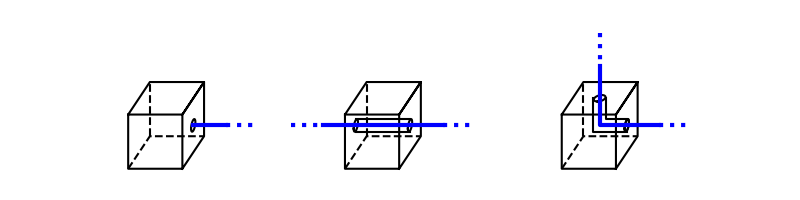
* Il y a 2 cubes bouts. Chacune des deux extrémités de l'elastique est fixée
  au centre d'une face d'un bout.
* Les cubes droits et les cubes coins sont transpercés par un trou dans lequel coulisse 
  l'élastique. Dans un cube droit le trou relie deux faces opposées
  et, dans un cube coin, il relie deux faces contiguës.
  
L'élastique est suffisamment tendu pour que deux cubes successifs du serpent soient
appuyés l'un contre l'autre ; il est assez lâche pour que l'on puisse 
le manipuler. Le but est de former, si possible, un gros cube de côté $3$ :

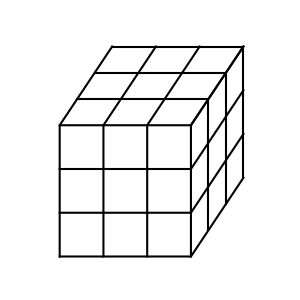

## Représentation des données et des solutions

Un exemple de serpent est le *cobra bleu* représenté
par la chaîne de 25 caractères 

$+-+-+-+----+-+---+--+---+$

dans laquelle les $+$ symbolisent les cubes droits et les $-$ les coins 
(les bouts ne sont pas représentés) :

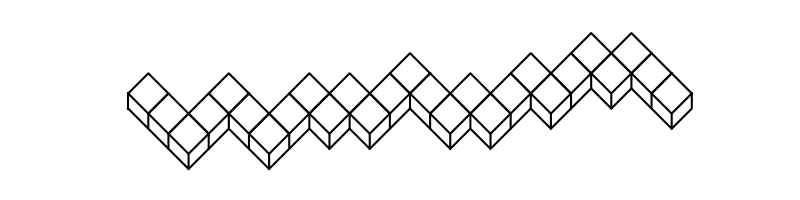

Une solution (essentiellement la seule) du cobra bleu
est donnée par la figure située à la fin de cette page.

On définit un *graphe non orienté*   $CUBE=(S,A)$ par l'ensemble $S$
de ses *sommets* et l'ensemble $A$ de ses *arcs* :
* Les sommets sont les $27$ points  $P=(x,y,z)$ de l'espace dont
  les coordonnées $x$, $y$ et $z$ valent soit $0$, soit $1$, soit $2$ ; 
  autrement dit, $S=\{0,1,2\}^3$.
* Un arc est une paire de sommets $\{P,Q\}$ où $Q$ s'obtient à partir 
  de $P$ en ajoutant ou en retranchant $1$ à une et une seule des 
  trois coordonnées de $P$. Ainsi $\{(1,2,0),(1,1,0)\}$ est un arc mais 
  $\{(1,2,0),(1,0,0)\}$ et $\{(1,2,0),(1,1,1)\}$ n'en sont pas. 
  
Le graphe $CUBE$ est représenté ci-dessous 

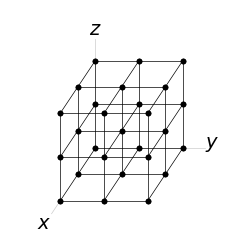

On se propose d'écrire une fonction "calcSols" qui prend en argument un Cube-Serpent
et qui affiche les solutions aux isométries près.

Un Cube-Serpent sera appelé un *jeu*
et représenté par une chaîne de caractères de longueur 25 sur l'alphabet $\{+,-\}$ ;
par exemple, *Cobra Bleu* $= +-+-+-+----+-+---+--+---+$

Une solution est un ordonnancement $(p_0,...,p_{26})$ des 27 sommets de $CUBE$.
Elle sera représentée par : $p_0,p_1-p_0,...,p_{26}-p_{25}$.
Comme les $p_i-p_{i-1}$ sont soit des vecteurs de la base 
canonique $i$, $j$, $k$, soit $-i$, $-j$ ou $-k$, on représentera ces vecteurs
respectivement par les lettres $X, Y, Z, x, y, z$.
    
 Ainsi calcSols(*Cobra Bleu*) affichera $000XXYYxxZZXzXyyxxZYzzXZZyXYY$
  

## Méthode

 
Voir le code (backtraking classique).
    
Si $(x,y,z)\in\{0,1,2\}^3$ est soit un sommet de $CUBE$, soit un vecteur 
de la base canonique, il est représenté par l'entier 
$x + 3y + 9z\in[|0,26|]$.
 
Pour élaguer l'arbre des appels récursifs en utilisant
les isométries de $CUBE$, on n'autorise que certains débuts (voir la fonction calc);
et si $p_0,..,p_k$ sont dans le plan $x = 1$ ($k$ maximum), 
on impose $p_{k+1} = p_k - i$ (on coupe la branche     $p_{k+1} = p_k + i$).
 
### Limitations
    
Si jeu est un palindrome, l'inverse d'une solution 
est aussi une solution. La fonction calcSols affiche
les deux solutions. Ainsi calcSols(cubraPurple) affiche
12 solutions alors qu'il n'y en a fondamentalement que 6.
 
En fait il est possible (et pas plus difficile) de calculer 
une fois pour toutes les solutions de tous les jeux possibles.
Il suffit de calculer tous les [chemins hamiltoniens](https://fr.wikipedia.org/wiki/Graphe_hamiltonien#:~:text=En%20math%C3%A9matiques%2C%20dans%20le%20cadre,qui%20poss%C3%A8de%20un%20cycle%20hamiltonien.)
du graphe CUBE et de considérer chacun de ces chemins
comme une solution du jeu correspondant.
Néanmoins un tel procédé est coûteux. Voir par exemple la page très complète de [Jaap Scherphuis](https://www.jaapsch.net/puzzles/snakecube.htm).

## Implémentation

In [1]:
import numpy as np

def addVect(p,v): # p = un sommet du CUBE, v = + ou - un vect de la b.c.

  aux = p // abs(v)
  if v > 0: aux += 1
  if aux % 3 == 0: return None # p + v en dehors du CUBE
  else: return p + v

def calcSols(jeu):

  code = {1 : 'X', -1 : 'x', 3 : 'Y', -3 : 'y', 9 : 'Z', -9 : 'z'}
  i = None                       # sommet initial
  s = np.zeros(26,dtype='int8')  # + ou - vecteurs de la base canonique => la solution partielle courante s_0,..,s_{n-1}
  c = np.zeros(27,dtype='bool')  # cubes placés
  n = 0                          # nombre de cubes placés
  p = None                       # dernier cube placé
  b = np.zeros(27,dtype='bool')  # b[0],..,b[n-1] = True si les n cubes placés sont dans le plan x = 1
  e = 0                          # nombre d'essais avant d'aboutir à la solution
  t = 0                          # nombre total d'essais  

  def avancer(q): # placer q
    nonlocal s, c, n, p, b, e
    e += 1
    c[q] = True
    if n == 0: 
      b[0] = q % 3 == 1
    else:
      s[n-1] = q - p
      b[n] = b[n-1] and q % 3 == 1 
    n += 1
    p = q

  def reculer():
    nonlocal s, c, n, p
    c[p] = False
    n -= 1
    if n != 0: p -= s[n-1] 

  def parcourir(): # fonction récursive principale (backtraking)
    nonlocal i, s, c, n, p, b, e, t
    if n == 27: 
      print('{}{} {:5} essais'.format(i,''.join([code[v] for v in s]),e)) # solution trouvée
      t += e
      e = 0
    else:
      v = s[n-2] # vecteur joignant l'avant-dernier et le dernier (p) cube placé
      l = []     # liste des vecteurs "ajoutables" à p pour obtenir le suivant
      if jeu[n-2] == '+': l.append(v)
      else:
        for w in [1,3,9]:
          if w != abs(v): # w,v orthogonaux
            l.append(w)
            if not(b[n-1] and w == 1): l.append(-w)
      for w in l:
        q = addVect(p,w)
        if q != None and not c[q]:
          avancer(q)
          parcourir()
          reculer()

  def calc(s,debut): 
    nonlocal i
    if jeu[:len(s)] == s:
      j = debut[0] 
      i = str(j % 3)+str((j // 3) % 3)+str((j // 9) % 3)
      for q in debut: avancer(q)
      parcourir()
      for q in debut: reculer()
            
  calc('+-',[0,1,2,5])    # coin
  calc('-',[0,1,4])       # coin
  calc('-',[1,0,3])       # milieu arête (inutile en fait)
  calc('',[1,4])          # milieu arête (inutile en fait)
  calc('',[4,1])          # centre face
  calc('-',[4,13,10])     # centre face
  calc('+-',[4,13,22,19]) # centre face
  calc('-',[13,4,1])      # centre cube  (inutile en fait)

  print('{} essais'.format(t + e))

### Tests

In [2]:

for nom,jeu in [
                ('Cubra Blue'  ,'+-+-+-+----+-+---+--+---+'),
                ('Cubra Red'   ,'+---------+-------+-+----'),
                ('Cubra Green' ,'+-+-+--+-+-+----+--+--+-+'),
                ('Cubra Orange','+-+----+--------+---+---+'),
                ('Cubra Purple','----+-+-----------+-+----'),
                ('Kev 9B'      ,'+---+-+-------------+-+--')]: 
      print('\n' + nom + '\n   ' + jeu)
      calcSols(jeu)


Cubra Blue
   +-+-+-+----+-+---+--+---+
000XXYYxxZZXzXyyxxZYzzXZZyXYY    68 essais
275 essais

Cubra Red
   +---------+-------+-+----
000XXYxYXZxZXyyzYxZyxYYzzyZyX   333 essais
000XXYZyxYZxYzzXyxZyZXXYYxzXz 13071 essais
000XXYZyxYzxYZZXyxzyZXXYYzxzX   389 essais
000XXYZyxZXYxzzxYZXzXZZxxyzyZ   255 essais
000XXYZyZxzxZYYXzyZXYzzxxZyzX  1609 essais
000XXYZyZxzxZYYzXZyXYzzxxyXZx   101 essais
000XXYZyZxzxZYYzXZyXYzzxxyZXz     3 essais
000XXYZyZxzxZYYzyXzxYXXZZyxYz    91 essais
000XXYZyZYxYXzzxZyzxYZZyyXzxY   259 essais
000XXYZyZYxyzYYxzyXYXZZxxyzyZ   721 essais
25291 essais

Cubra Green
   +-+-+--+-+-+----+--+--+-+
000XXYYxxZXXyyxxZXYzzxZZYXXyy    82 essais
210 essais

Cubra Orange
   +-+----+--------+---+---+
000XXYYxZXyyxZxzYZYzzyXZZYXyy  1496 essais
4179 essais

Cubra Purple
   ----+-+-----------+-+----
000XYXyZZxxYXYxzXyXZYzzxxyZyX  6771 essais
000XYXyZZxxYXzYzXZyZYxxzzyZyX   342 essais
000XYxYXXZZyxYxzXyXzyZZxxYzyX  8925 essais
000XYxYXXZZyxYzxZyzyZXXzzYZxy   137 essais
000XYxYZZXXyx

## Affichage graphique des solutions

In [3]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
 
alpha = 0.4
beta = 0.6
    
def plot3d(ax,x,y,z,**kwargs):

    global alpha, beta
    
    X = [v - alpha * u for (u,v) in zip(x,y)]
    Y = [w - beta * u for (u,w) in zip(x,z)]
    ax.plot(X,Y,**kwargs)     

def afficheSolution(s):
    
    global alpha, beta

    fig = plt.figure()
    ax = fig.add_subplot(111,aspect = 'equal')
    plt.axis('equal')
    plt.axis('off')
    
    plot3d(ax,[2,2.5],[0,0],[0,0], color = '0.8', linewidth = 0.5)
    plot3d(ax,[0,0],[2,2.5],[0,0], color = '0.8', linewidth = 0.5)
    plot3d(ax,[0,0],[0,0],[2,2.5], color = '0.8', linewidth = 0.5)
    
    ax.annotate(r"$x$",xy = (-alpha * 2.5,-beta*2.5),fontsize = 18,
            horizontalalignment='right', verticalalignment='top')
    ax.annotate(r"$y$",xy = (2.5,0),fontsize = 18)
    ax.annotate(r"$z$",xy = (0,2.5),fontsize = 18,
                horizontalalignment='center', verticalalignment='bottom') 
    for a in range(3):
        for b in range(3):
            plot3d(ax,[a,a],[b,b],[0,2], color = '0', linewidth = 0.5)
            plot3d(ax,[a,a],[0,2],[b,b], color = '0', linewidth = 0.5)
            plot3d(ax,[0,2],[a,a],[b,b], color = '0', linewidth = 0.5)
        
    xc,yc,zc = int(s[0]),int(s[1]),int(s[2])
    x,y,z = [xc], [yc], [zc]
        
    for c in s[3:]:
        if c == 'X':
            xc += 1
        elif c == 'x':
            xc -= 1
        elif c == 'Y':
            yc += 1
        elif c == 'y':
            yc -= 1
        elif c == 'Z':
            zc += 1
        else:
            zc -= 1
        x.append(xc)
        y.append(yc)
        z.append(zc)
        
    plot3d(ax,x,y,z,color = 'blue', linewidth = 3, marker = 'o')
    plot3d(ax,[int(s[0])],[int(s[1])],[int(s[2])],color = 'green', marker = 'o')  
    plot3d(ax,[xc],[yc],[zc],color = 'red', marker = 'o')

### Test

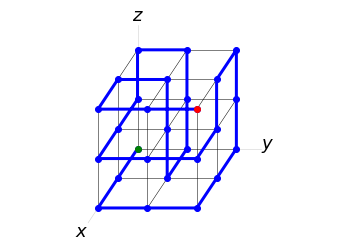

In [6]:
afficheSolution('000XXYYxxZZXzXyyxxZYzzXZZyXYY')